## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Load world bank projects dataset and see how it looks

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize

# load json as string
data = json.load((open('data/world_bank_projects.json')))
#data

In [2]:
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


### 1. Find the 10 countries with most projects

In [3]:
json_df.countryshortname.value_counts().sort_values(ascending=False)[:10]

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [4]:
# Pick the top 10 themes using 'name', including blank theme
norm_theme = json_normalize(data, 'mjtheme_namecode')
norm_theme['name'].value_counts()[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [5]:
#below calculates the top 10 themes using 'code'
norm_theme['code'].value_counts()[:10]

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [6]:
# create a look up table between 'name' and 'code'
lookup = norm_theme.loc[norm_theme.name != '',:].groupby(['code','name']).count().reset_index()
lookup.head()

,code,name
0,1,Economic management
1,10,Rural development
2,11,Environment and natural resources management
3,2,Public sector governance
4,3,Rule of law


In [7]:
#create a custom function to leverage the lookup table to derive the corresponding 'name' based on 'code'
def cf(x, code_table):
    return code_table.loc[code_table.code == x, 'name'].values[0] #values[0] gives the proper string type, all others are of series or nparray type

In [9]:
#create a temporary table to hold the new column with names filled
tmp = norm_theme.copy()
tmp['name_filled'] = tmp['code'].apply(lambda x: cf(x, lookup))
tmp.head()

,code,name,name_filled
0,8,Human development,Human development
1,11,,Environment and natural resources management
2,1,Economic management,Economic management
3,6,Social protection and risk management,Social protection and risk management
4,5,Trade and integration,Trade and integration


In [10]:
#drop the 'name' column and rename the 'name_filled' column with 'name'
#tmp1 is the final dataframe with missing values filled in 
tmp1 = tmp.drop('name',axis=1)
tmp1.columns = ['code','name']
tmp1.name.value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64

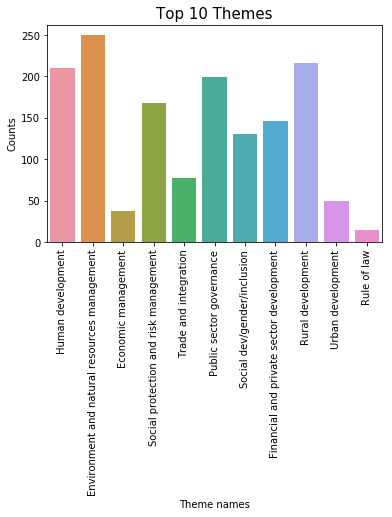

In [11]:
#print top 10 themes after filling in the missing themes
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(x='name', data=tmp1)
g.set_title("Top 10 Themes", fontsize=15)
g.set_xlabel("Theme names", fontsize=10)
g.set_ylabel("Counts", fontsize=10)
plt.xticks(rotation=90)
plt.show()

### Another way to fill in the blank names:

In [12]:
tmp = norm_theme.copy()
tmp.columns = ['code','old_name']
tmp = pd.merge(tmp, lookup, on = 'code', how = 'inner')

#tmp1 is the final dataframe with the missing values filled in.
tmp1 = tmp.drop('old_name',axis=1)
tmp1.name.value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64

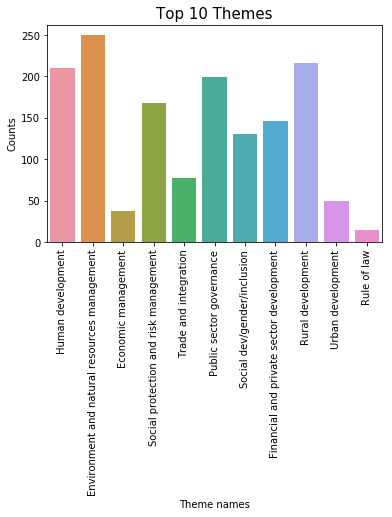

In [13]:
#print top 10 themes after filling in the missing themes
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(x='name', data=tmp1)
g.set_title("Top 10 Themes", fontsize=15)
g.set_xlabel("Theme names", fontsize=10)
g.set_ylabel("Counts", fontsize=10)
plt.xticks(rotation=90)
plt.show()